In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('House Price India.csv')

In [3]:
df.shape

(14620, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [5]:
def rename_columns(columns):
    return columns.lower().replace(' ','_')

In [6]:
df.rename(columns=rename_columns, inplace=True)

In [7]:
df.head()

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),area_of_the_basement,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [8]:
df.date.sample(10)

7215     42599
3059     42539
7214     42599
5680     42574
4165     42553
12391    42686
4977     42566
6424     42586
13752    42713
1876     42523
Name: date, dtype: int64

In [9]:
df.postal_code.nunique()

70

In [10]:
df.drop(['id','date','postal_code','lattitude','longitude'],axis = 1,inplace = True)

In [11]:
df.columns

Index(['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'number_of_floors', 'waterfront_present', 'number_of_views',
       'condition_of_the_house', 'grade_of_the_house',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'renovation_year', 'living_area_renov', 'lot_area_renov',
       'number_of_schools_nearby', 'distance_from_the_airport', 'price'],
      dtype='object')

In [12]:
df.shape

(14620, 18)

In [13]:
df.isnull().sum()

number_of_bedrooms                       0
number_of_bathrooms                      0
living_area                              0
lot_area                                 0
number_of_floors                         0
waterfront_present                       0
number_of_views                          0
condition_of_the_house                   0
grade_of_the_house                       0
area_of_the_house(excluding_basement)    0
area_of_the_basement                     0
built_year                               0
renovation_year                          0
living_area_renov                        0
lot_area_renov                           0
number_of_schools_nearby                 0
distance_from_the_airport                0
price                                    0
dtype: int64

In [14]:
df.sample(20)

,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,grade_of_the_house,area_of_the_house(excluding_basement),area_of_the_basement,built_year,renovation_year,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
3781,3,3.25,2310,3075,2.0,0,0,3,8,1730,580,2005,0,2310,3075,1,69,589500
8038,3,2.00,2870,6360,1.5,0,1,4,8,1790,1080,1946,0,2310,6466,1,73,810000
2510,3,1.75,1570,4875,1.0,0,0,4,7,1310,260,1977,0,1380,5200,3,53,214950
10188,3,1.75,1970,8540,1.0,0,3,4,8,1130,840,1950,0,2280,8540,3,71,606000
381,3,1.75,1460,7700,1.0,0,0,3,7,1460,0,1979,0,1720,7280,1,63,424500
8448,3,1.75,1490,16200,1.0,0,0,5,8,1490,0,1958,0,2070,16200,2,66,685650
6868,3,1.00,1100,8138,1.0,0,0,3,7,1100,0,1949,0,1440,8131,3,63,241450
11791,3,1.00,1780,5236,1.5,0,0,5,6,1050,730,1944,0,1260,5320,1,58,375000
9297,3,2.50,2120,2374,2.0,0,0,3,8,1770,350,2005,0,2480,3043,1,57,470000
6477,5,2.25,2060,9000,1.0,0,0,4,7,1320,740,1961,0,2050,8800,1,66,509500


# PRICE

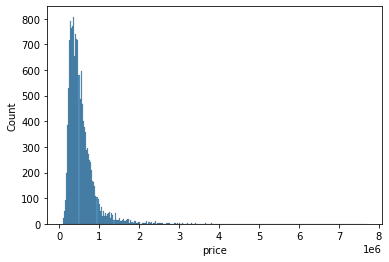

In [15]:
sns.histplot(x = df.price);

In [16]:
conti = df.loc[:,['number_of_bedrooms', 'number_of_bathrooms', 'living_area', 'lot_area',
       'area_of_the_house(excluding_basement)', 'area_of_the_basement',
       'built_year', 'living_area_renov', 'lot_area_renov', 'distance_from_the_airport', 'price']]

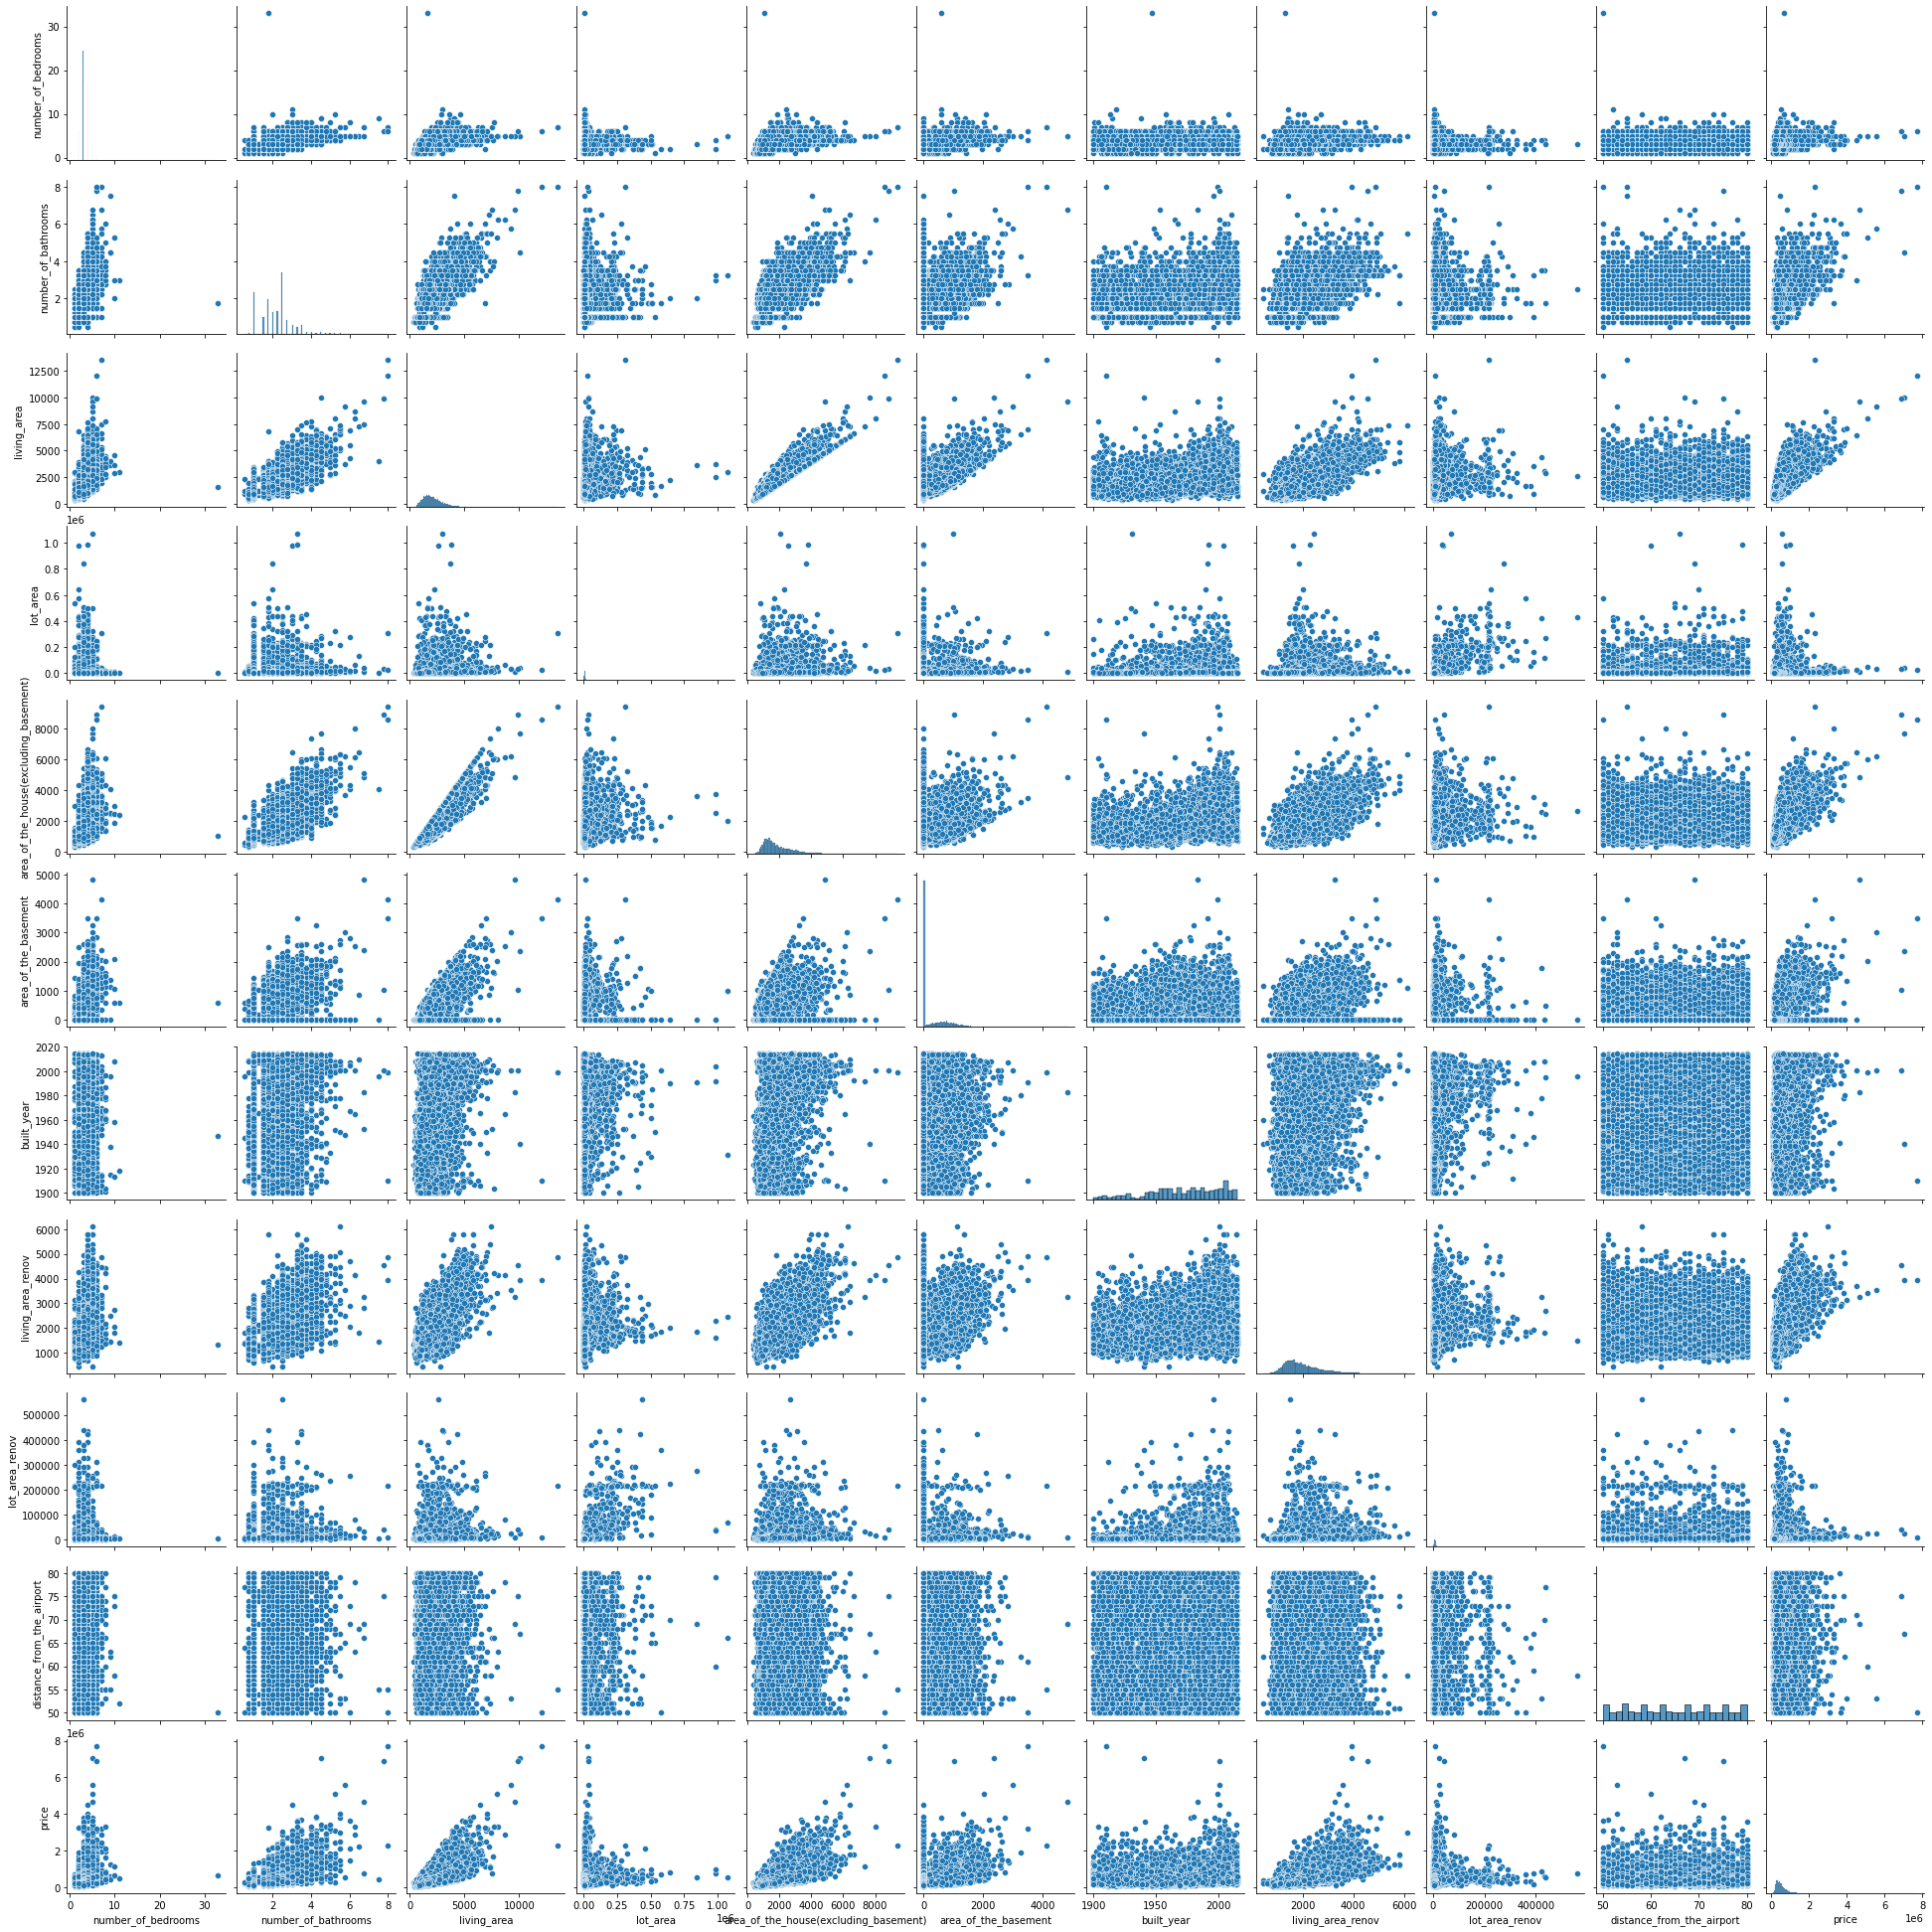

In [17]:
sns.pairplot(conti);

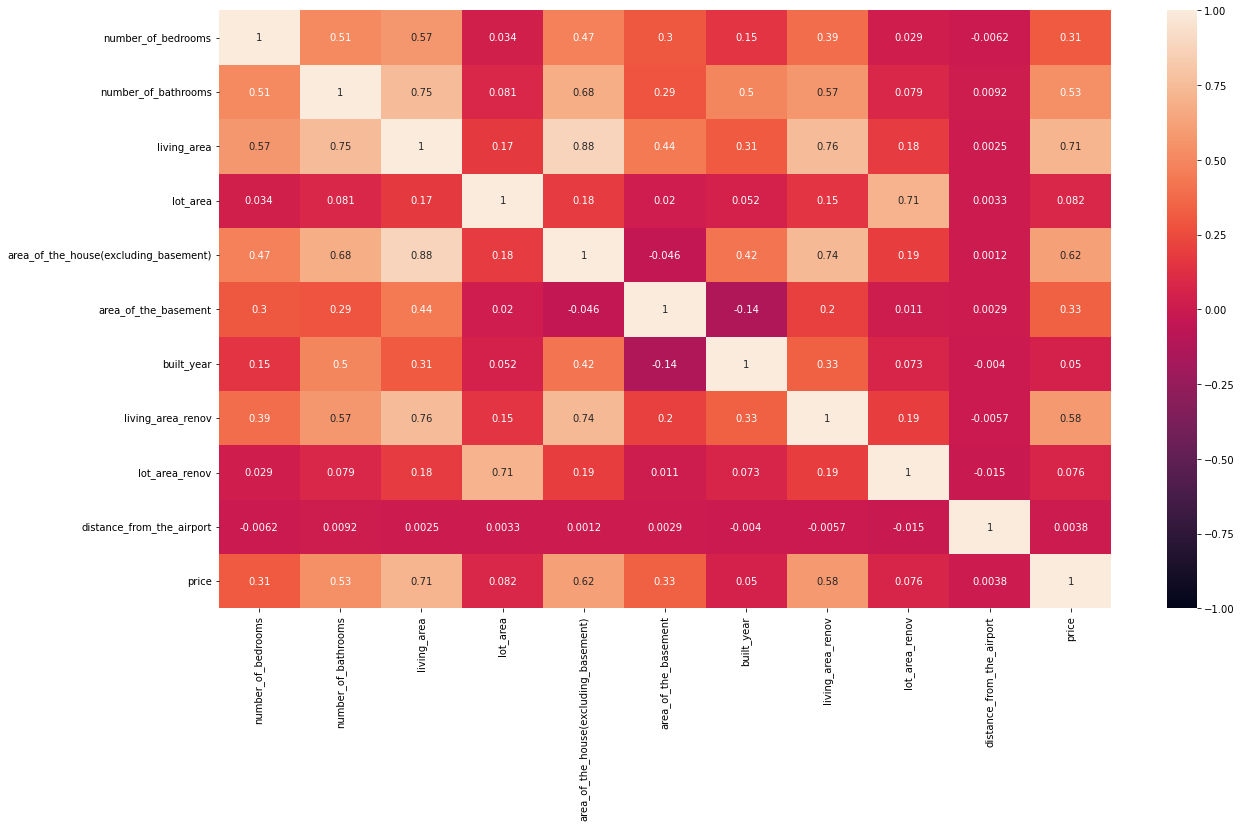

In [18]:
plt.figure(figsize=(20,11))
sns.heatmap(conti.corr(),vmin = -1,vmax = 1,annot=True);

In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [46]:
dt = DecisionTreeRegressor(random_state = 83)

In [47]:
model_params = {'max_depth': [2,3,4,5,6,7,8,9,None],
               'min_samples_split' : [i for i in range (1,11)]}

search = GridSearchCV(dt,model_params,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [50]:
dt = DecisionTreeRegressor(max_depth = 8, min_samples_split = 3)

In [51]:
model = dt.fit(X_train,y_train)

In [53]:
y_pred = model.predict(X_test)

##### evaluation

In [54]:
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
r2_score(y_test,y_pred)

0.6911339310389351

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

214564.83015071187

# RANDOM FOREST

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor(random_state = 83)

In [67]:
params = {'n_estimators':[20,40,60,80,100],
          'max_features':['sqrt',0.25,0.50,0.75,1],
          'max_depth': [2,3,4,5,6,7,8,9,None]}

In [70]:
search = RandomizedSearchCV(rf,params,cv = 10)
search.fit(X_train,y_train)
search.best_params_

{'n_estimators': 60, 'max_features': 0.5, 'max_depth': None}

In [71]:
rf = RandomForestRegressor(n_estimators = 60, max_features =  0.5, max_depth = None)

In [74]:
model = rf.fit(X_train,y_train)

In [75]:
y_pred = model.predict(X_test)

##### evaluation

In [76]:
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
r2_score(y_test,y_pred)

0.7679935456912059

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

185961.68397882304

# ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ada = AdaBoostRegressor(random_state = 86)

In [81]:
params = {'n_estimators' : [i for i in range(0,500,50)],
         'learning_rate':[1.0,0.2,0.1,0.01,0.05,0.001]}

search = RandomizedSearchCV(ada,params,n_jobs = -1,cv = 10)
search.fit(X_train,y_train)
search.best_params_

In [83]:
ada = AdaBoostRegressor(n_estimators = 300,learning_rate = 0.01,random_state = 83)

In [84]:
model = ada.fit(X_train,y_train)

In [85]:
y_pred = model.predict(X_test)

##### evaluation

In [86]:
from sklearn.metrics import mean_squared_error,r2_score

In [87]:
r2_score(y_test,y_pred)

0.6365527670056925

In [88]:
np.sqrt(mean_squared_error(y_test,y_pred))

232752.37448116293

# GRADBOOST

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
gbc = GradientBoostingRegressor(random_state = 83)

In [95]:
params = {'n_estimators' : [i for i in range(0,400,50)],
         'learning_rate':[1.0,0.2,0.1,0.01,0.05,0.001]}

In [96]:
search = RandomizedSearchCV(gbc,params,n_jobs = -1,cv = 10)
search.fit(X_train,y_train)
search.best_params_

{'n_estimators': 200, 'learning_rate': 0.2}

In [97]:
gbc = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.2,random_state = 83)

In [98]:
model = gbc.fit(X_train,y_train)

In [99]:
y_pred = model.predict(X_test)

##### evaluation

In [100]:
from sklearn.metrics import mean_squared_error,r2_score

In [101]:
r2_score(y_test,y_pred)

0.7723484446117246

In [102]:
np.sqrt(mean_squared_error(y_test,y_pred))

184208.11047348287

# Gradient boosting regressor gives the best model